<h1><center>CSEN1022:Assignment 1</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Youssef Ahmed Wasfy

GUC-ID: 43-3793

Elective Tutorial No.: T05

**Member 2**

Name: Omar Khaled Hassan Mohamed

GUC-ID: 43-4648

Elective Tutorial No.: T06

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [325]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data (Edit)

In [326]:
labels = ['airplane', 'automobile', 'frog']
def retrieveData(direc, count):
    data = []
    for label in labels:
        for i in range(count):
            img = plt.imread(f'/Users/ahmedwasfy/Downloads/assignment_1-YoussefWasfy-master/Data/{direc}/{label}/'+str(i)+'.jpg').reshape(-1)
            data.append([img, label])
    return data

In [327]:
def getData():
    train = retrieveData("train", 5000)
    test = retrieveData("test", 1000)
    x_train = np.array([img[0] for img in train])/255
    y_train = np.array([img[1] for img in train])
    X_test = np.array([img[0] for img in test])/255
    y_test = np.array([img[1] for img in test ])
    return (x_train, y_train), (X_test, y_test)



In [336]:
train, test = getData()
train_data = train[0]
train_labels = train[1]
X_test = test[0]
test_labels = test[1]

<hr style="border:2px solid black"> </hr>

## Construct Fischer's Linear Discriminant classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [338]:
# Write code here
# Train
# airplane
print('starting airplane')
airplane = np.array(train_data[0:5000])
other_classes = np.array(train_data[5000:15000])
m_a = np.mean(airplane, axis=0).reshape((-1,1))
m_not_a = np.mean(other_classes, axis=0).reshape((-1,1))
sw_a = np.empty((3072, 3072))
sw_not_a = np.empty((3072, 3072))
for img in airplane:
    sw_a += (img.reshape((-1,1)) - m_a) @ ((img.reshape((-1,1)) - m_a).reshape((1,3072)))
for img in other_classes:
    sw_not_a += (img.reshape((-1,1)) - m_not_a) @ (((img.reshape((-1,1)) - m_not_a)).reshape((1,3072)))
sw_air = np.add(sw_a, sw_not_a)
sw_inverse_air = np.linalg.inv(sw_air)
C_air = sw_inverse_air @ (m_a - m_not_a)
Wnode_air =  (C_air.reshape((1,3072))) @ (-0.5*(np.add(m_a, m_not_a)))
# car
print('starting car')
car = np.array(train_data[5000:10000])
other_classes1 = np.append(train_data[0:5000], train_data[10000:15000]).reshape((10000,3072))
m_c = np.mean(car, axis=0).reshape((-1,1))
m_not_c = np.mean(other_classes1, axis=0).reshape((-1,1))
sw_c = np.empty((3072, 3072))
sw_not_c = np.empty((3072, 3072))
for img in car:
    sw_c += (img.reshape((-1,1)) - m_c) @ ((img.reshape((-1,1)) - m_c).reshape((1,3072)))
for img in other_classes1:
    sw_not_c += (img.reshape((-1,1)) - m_not_c) @ (((img.reshape((-1,1)) - m_not_c)).reshape((1,3072)))
sw_car = np.add(sw_c, sw_not_c)
sw_inverse_car = np.linalg.inv(sw_car)
C_car = sw_inverse_car @ (m_c - m_not_c)
Wnode_car = (C_car.reshape((1,3072))) @ (-0.5*(np.add(m_c, m_not_c)))
# Frog
print('starting frog')
frog = np.array(train_data[10000:15000])
other_classes2 = np.array(train_data[0:10000])
m_f = np.mean(frog, axis=0).reshape((-1,1))
m_not_f = np.mean(other_classes2, axis=0).reshape((-1,1))
sw_f = np.empty((3072, 3072))
sw_not_f = np.empty((3072, 3072))
for img in frog:
    sw_f += (img.reshape((-1,1)) - m_f) @ ((img.reshape((-1,1)) - m_f).reshape((1,3072)))
for img in other_classes2:
    sw_not_f += (img.reshape((-1,1)) - m_not_f) @ (((img.reshape((-1,1)) - m_not_f)).reshape((1,3072)))
sw_frog = np.add(sw_f, sw_not_f)
sw_inverse_frog = np.linalg.inv(sw_frog)
C_frog = sw_inverse_frog @ (m_f - m_not_f)
Wnode_frog = (C_frog.reshape((1,3072))) @ (-0.5*(np.add(m_f, m_not_f)))

# Test
print('Testing')
def predict(scount, ecount):
    predictions = []
    for i in range(scount, ecount):
        p_air = np.dot(C_air.reshape(1,3072), X_test[i].reshape((-1,1))) + Wnode_air
        p_car = np.dot(C_car.reshape(1,3072), X_test[i].reshape((-1,1))) + Wnode_car
        p_frog = np.dot(C_frog.reshape(1,3072), X_test[i].reshape((-1,1))) + Wnode_frog
        prediction = [p_air, p_car, p_frog]
        index = np.argmax(prediction)
        predictions.append(index)
    return predictions
def prediction_result(predictions):
    C_air = 0
    C_car= 0
    C_frog = 0
    for prediction in predictions:
        if prediction == 0:
            C_air += 1
        elif prediction == 1:
            C_car += 1
        elif prediction == 2:
            C_frog +=1
    return [C_air, C_car, C_frog]
def confusion_mat(first, second, third):
    matrices = [first, second, third]
    confusion_matrix = []
    for matrix in matrices:
        for value in matrix:
            confusion_matrix.append(value)
    return np.array(confusion_matrix).reshape((3,3))
            
            
first_predictions = predict(0,1000)
second_predictions = predict(1000,2000)
third_predictions = predict(2000, 3000)
first_results = prediction_result(first_predictions)
second_results = prediction_result(second_predictions)
third_results = prediction_result(third_predictions)
# confusion_matrix =
confusion_matrix = confusion_mat(first_results, second_results, third_results)
print(confusion_matrix.shape)
print(first_results)
print(second_results)
print(third_results)

 

starting airplane
starting car
starting frog
Testing
(3, 3)
[709, 118, 173]
[159, 540, 301]
[111, 220, 669]


In [339]:
print(X_test[0].reshape((-1,1)).shape)
print(C_air.shape)

(3072, 1)
(3072, 1)


## Confusion Matrix (Don't Edit)

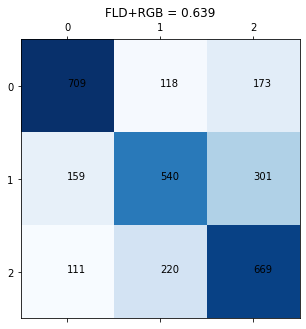

In [340]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

### Repeat for Grayscale

In [254]:
labels = ['airplane', 'automobile', 'frog']
def retrieveData(direc, count):
    data = []
    for label in labels:
        for i in range(count):
            img = plt.imread(f'/Users/ahmedwasfy/Downloads/assignment_1-YoussefWasfy-master/Data/{direc}/{label}/'+str(i)+'.jpg')
            R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
            img_gray = (0.3 * R) + (0.59 * G) + (0.11 * B)
            data.append([img_gray, label])
    return data

In [255]:
def getData():
    train = retrieveData("train", 5000)
    test = retrieveData("test", 1000)
    x_train = (np.array([img[0] for img in train])/255).reshape(15000,1024)
    y_train = np.array([img[1] for img in train])
    X_test = (np.array([img[0] for img in test])/255).reshape(3000,1024)
    y_test = np.array([img[1] for img in test ])
    return (x_train, y_train), (X_test, y_test)



In [256]:
train, test = getData()
train_data = train[0]
train_labels = train[1]
X_test = test[0]
test_labels = test[1]

In [257]:
print(train_data.shape)
print(X_test.shape)

(15000, 1024)
(3000, 1024)


In [258]:
# Write code here
# Train
print('starting car')
# car
car = np.array(train_data[5000:10000])
other_classes1 = np.append(train_data[0:5000], train_data[10000:15000]).reshape((10000,1024))
m_c = np.mean(car, axis=0).reshape((-1,1))
m_not_c = np.mean(other_classes1, axis=0).reshape((-1,1))
sw_c = np.empty((1024, 1024))
sw_not_c = np.empty((1024, 1024))
for img in car:
    sw_c += (np.subtract(img.reshape((-1,1)), m_c))@((np.subtract(img.reshape((-1,1)), m_c)).reshape((1,1024)))
for img in other_classes1:
    sw_not_c += (np.subtract(img.reshape((-1,1)), m_not_c))@((np.subtract(img.reshape((-1,1)), m_not_c)).reshape((1,1024)))
sw_car = np.add(sw_c, sw_not_c)
sw_inverse_car = np.linalg.inv(sw_car)
C_car = np.matmul(sw_inverse_car, np.subtract(m_c,m_not_c))
Wnode_car = np.matmul(C_car.transpose(), -0.5*(np.add(m_c, m_not_c)))
print('starting airplane')
# airplane
airplane = np.array(train_data[0:5000])
other_classes = np.array(train_data[5000:15000])
m_a = np.mean(airplane, axis=0).reshape((-1,1))
m_not_a = np.mean(other_classes, axis=0).reshape((-1,1))
sw_a = np.empty((1024, 1024))
sw_not_a = sw_a = np.empty((1024, 1024))
for img in airplane:
    sw_a += (np.subtract(img.reshape((-1,1)), m_a))@((np.subtract(img.reshape((-1,1)), m_a)).reshape((1,1024)))
for img in other_classes:
    sw_not_a += (np.subtract(img.reshape((-1,1)), m_not_a))@((np.subtract(img.reshape((-1,1)), m_not_a)).reshape((1,1024)))
sw_air = np.add(sw_a, sw_not_a)
sw_inverse_air = np.linalg.inv(sw_air)
C_air = np.matmul(sw_inverse_air, np.subtract(m_a,m_not_a))
Wnode_air = np.matmul(C_air.transpose(), -0.5*(np.add(m_a, m_not_a)))
print('starting frog')
# Frog
frog = np.array(train_data[10000:15000])
other_classes2 = np.array(train_data[0:10000])
m_f = np.mean(frog, axis=0).reshape((-1,1))
m_not_f = np.mean(other_classes2, axis=0).reshape((-1,1))
sw_f = np.empty((1024, 1024))
sw_not_f = np.empty((1024, 1024))
for img in frog:
    sw_f += (np.subtract(img.reshape((-1,1)), m_f))@((np.subtract(img.reshape((-1,1)), m_f)).reshape((1,1024)))
for img in other_classes2:
    sw_not_f += (np.subtract(img.reshape((-1,1)), m_not_f))@((np.subtract(img.reshape((-1,1)), m_not_f)).reshape((1,1024)))
sw_frog = np.add(sw_f, sw_not_f)
sw_inverse_frog = np.linalg.inv(sw_frog)
C_frog = np.matmul(sw_inverse_frog, np.subtract(m_f,m_not_f))
Wnode_frog = np.matmul(C_frog.transpose(), -0.5*(np.add(m_f, m_not_f)))

# Test
def predict(scount, ecount):
    predictions = []
    for i in range(scount, ecount):
        p_air = np.dot(C_air.reshape(1,1024), X_test[i].reshape((-1,1))) + Wnode_air
        p_car = np.dot(C_car.reshape(1,1024), X_test[i].reshape((-1,1))) + Wnode_car
        p_frog = np.dot(C_frog.reshape(1,1024), X_test[i].reshape((-1,1))) + Wnode_frog
        prediction = [p_air, p_car, p_frog]
        index = np.argmax(prediction)
        predictions.append(index)
    return predictions
def prediction_result(predictions):
    C_air = 0
    C_car= 0
    C_frog = 0
    for prediction in predictions:
        if prediction == 0:
            C_air += 1
        elif prediction == 1:
            C_car += 1
        elif prediction == 2:
            C_frog +=1
    return [C_air, C_car, C_frog]
def confusion_mat(first, second, third):
    matrices = [first, second, third]
    confusion_matrix = []
    for matrix in matrices:
        for value in matrix:
            confusion_matrix.append(value)
    return np.array(confusion_matrix).reshape((3,3))
            
            
first_predictions = predict(0,1000)
second_predictions = predict(1000,2000)
third_predictions = predict(2000, 3000)
first_results = prediction_result(first_predictions)
second_results = prediction_result(second_predictions)
third_results = prediction_result(third_predictions)
# confusion_matrix =
confusion_matrix = confusion_mat(first_results, second_results, third_results)
print(confusion_matrix.shape)
print(first_results)
print(second_results)
print(third_results)

 

starting car
starting airplane
starting frog
(3, 3)
[649, 138, 213]
[154, 606, 240]
[214, 237, 549]


## Confusion Matrix (Don't Edit)

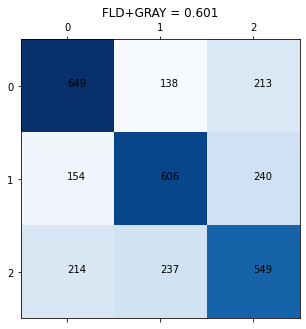

In [259]:
# Make sure the previous cell returns a variable called confusion_matrix
# Plot Confusion Matrix
accuracy = np.diag(confusion_matrix).sum()/X_test.shape[0]
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
plt.title('FLD+GRAY = {0:0.3f}'.format(accuracy))
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))

<hr style="border:2px solid black"> </hr>

## Comment on the change of accuracy between RGB and Grayscale
##########

Write Comment Here

...Between the RGB and the grey scale calssification the frog class suffered the biggest loss because the green component in the frog class is crucial to identify a frog and by converting the images to gray scale it immedietly discarded this feature and that's why it has the biggest difference.
...
...

##########
<hr style="border:2px solid black"> </hr>